In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#### read in scc data ####
df = pd.read_excel('/net/fs11/d0/emfreese/social_cost_carbon/scc_2013_tsd_output_july_2015_revision.xlsx', sheet_name = 1, header = [0,1,2,3,4], index_col = 0)
df = df.droplevel('scc_2013_tsd_output_july_2015_revision', axis=1)
df = df.transpose() #data is in 2007$/metric ton

#### read in emissions data ####
gmodel_egrid = xr.open_dataset(f'./data/gmodel_egrid_emissions_ds.nc')


In [6]:
#### CO2 values ####

normal_CO2 = ((gmodel_egrid.sel(model_name = 'normal_model')['PLCO2RTA']*gmodel_egrid.sel(model_name = 'normal_model')['annual_modelgeneration']).sum()*.001).values #metric tons
nonuc_CO2 = ((gmodel_egrid.sel(model_name = 'nonuc_model')['PLCO2RTA']*gmodel_egrid.sel(model_name = 'nonuc_model')['annual_modelgeneration']).sum()*.001).values #metric tons
dif_CO2 = nonuc_CO2 - normal_CO2

In [7]:
#### datasets for normal and no nuclear cost of CO2 emissions ####
df_nonuc = (df*nonuc_CO2)
df_normal = (df*normal_CO2)
df_dif = (df*dif_CO2)

In [8]:
df_dif

1             2             3      \
Model Year Scenario     Rate                                              
DICE  2010 IMAGE        0.025  4.588718e+10  7.990013e+10  4.264872e+10   
      2020 IMAGE        0.025  5.652775e+10  9.752366e+10  5.257352e+10   
      2030 IMAGE        0.025  6.680152e+10  1.136705e+11  6.219650e+10   
      2040 IMAGE        0.025  7.821339e+10  1.312149e+11  7.290420e+10   
      2050 IMAGE        0.025  9.070328e+10  1.499023e+11  8.464600e+10   
...                                     ...           ...           ...   
PAGE  2050 MiniCAM Base 0.030  6.240305e+10  2.620741e+10  2.921803e+10   
                        0.025  2.529929e+10  4.525340e+11  4.956520e+10   
           5th Scenario 0.050  1.998029e+11  2.894170e+10  3.413933e+09   
                        0.030  4.487406e+10  1.349159e+10  1.504877e+10   
                        0.025  1.342679e+10  3.158538e+11  3.068394e+10   

                                      4             5             6      \
Model Year Scenario     Rate                                              
DICE  2010 IMAGE        0.025  2.501129e+10  4.921997e+10  8.122838e+10   
      2020 IMAGE        0.025  3.087937e+10  6.059473e+10  9.910377e+10   
      2030 IMAGE        0.025  3.667408e+10  7.152759e+10  1.154443e+11   
      2040 IMAGE        0.025  4.318180e+10  8.363539e+10  1.331853e+11   
      2050 IMAGE        0.025  5.040066e+10  9.682382e+10  1.520661e+11   
...                                     ...           ...           ...   
PAGE  2050 MiniCAM Base 0.030  1.699889e+10  6.808723e+10  1.994278e+10   
                        0.025  1.254969e+11  2.670245e+10  4.581902e+09   
           5th Scenario 0.050  1.036925e+10  2.114307e+09  1.821578e+10   
                        0.030  8.649059e+09  3.309020e+10  1.480367e+10   
                        0.025  6.882187e+10  2.141219e+10  2.191796e+09   

                                      7             8             9      \
Model Year Scenario     Rate                                              
DICE  2010 IMAGE        0.025  6.828030e+10  3.131810e+10  1.469361e+10   
      2020 IMAGE        0.025  8.363643e+10  3.866435e+10  1.810005e+10   
      2030 IMAGE        0.025  9.799093e+10  4.587933e+10  2.147858e+10   
      2040 IMAGE        0.025  1.137251e+11  5.395878e+10  2.527659e+10   
      2050 IMAGE        0.025  1.306747e+11  6.288955e+10  2.948665e+10   
...                                     ...           ...           ...   
PAGE  2050 MiniCAM Base 0.030  2.676371e+10  6.868833e+09  1.524952e+10   
                        0.025  1.582826e+10  2.191069e+10  2.453921e+11   
           5th Scenario 0.050  2.111193e+10  1.633580e+10  2.271405e+10   
                        0.030  1.359250e+10  3.918938e+09  3.185862e+09   
                        0.025  6.209027e+09  9.795058e+09  1.981799e+11   

                                      10     ...         9991          9992   \
Model Year Scenario     Rate                 ...                               
DICE  2010 IMAGE        0.025  3.916272e+10  ...  8.440919e+10  4.307698e+10   
      2020 IMAGE        0.025  4.830766e+10  ...  1.028810e+11  5.309692e+10   
      2030 IMAGE        0.025  5.721357e+10  ...  1.196738e+11  6.280682e+10   
      2040 IMAGE        0.025  6.714234e+10  ...  1.378711e+11  7.360872e+10   
      2050 IMAGE        0.025  7.805284e+10  ...  1.571972e+11  8.545078e+10   
...                                     ...  ...           ...           ...   
PAGE  2050 MiniCAM Base 0.030  7.469710e+09  ...  2.351466e+11  1.805717e+11   
                        0.025  9.144728e+09  ...  6.046580e+10  1.217473e+11   
           5th Scenario 0.050  1.436382e+10  ...  8.430926e+09  1.506655e+09   
                        0.030  3.343878e+09  ...  1.482412e+11  1.597123e+11   
                        0.025  2.796949e+09  ...  3.522330e+10  4.712765e+10   

                                      9993          9994          999

In [9]:
(df_dif.droplevel('Model').droplevel('Scenario').loc[(2010, .025)].droplevel('Rate').values.flatten()*1e-9)

/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


array([45.88717598, 79.90012853, 42.64872378, ..., 80.48528332,
        2.1675466 ,  1.44906547])

/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


(150000,)
(150000,)
(150000,)


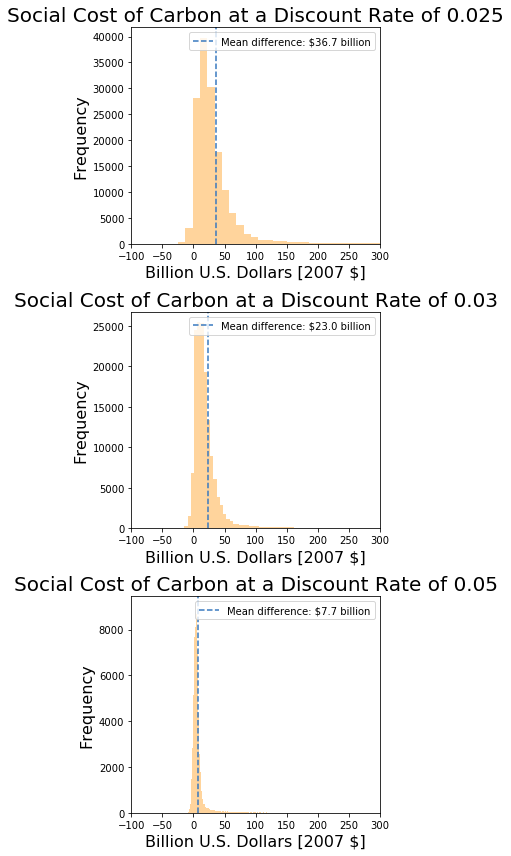

In [10]:
#### plot our SCC by discount rate ####
colors = ["tangerine", "windows blue"]
fig, axes = plt.subplots(3,1, figsize=[6,12],)
for idx_c, scc in enumerate([0.025,0.03,0.05]):
    ax = axes[idx_c]
    x = df_dif.droplevel('Model').droplevel('Scenario').loc[(2010, scc)].droplevel('Rate').values.flatten()*1e-9 #drop the levels for model, scenario type, choose 2010 levels
    print(x.shape)
    mean = x.mean()
    sns.distplot(x, 
                 ax = ax,
                 rug=False, kde = False, bins = 1000, 
                 color = sns.xkcd_palette(colors)[0],
                );
    ax.axvline(mean, color=sns.xkcd_palette(colors)[1], linestyle='--', label = f'Mean difference: ${np.round(mean,1)} billion')
    ax.legend()
    ax.set_title(f'Social Cost of Carbon at a Discount Rate of {scc}', fontsize = 20)
    ax.set_xlabel('Billion U.S. Dollars [2007 $]', fontsize = 16)
    ax.set_ylabel('Frequency', fontsize = 16)
    ax.set_xlim(-.1e3,.3e3)
plt.tight_layout()

/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


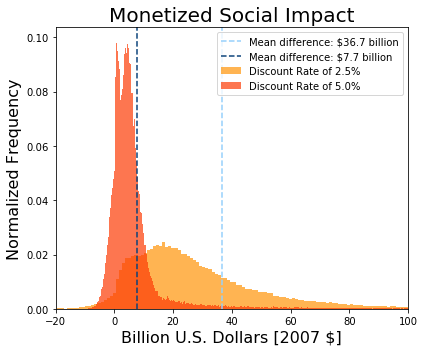

In [11]:
#### plot our SCC by discount rate ####
colors = ["tangerine","red orange"]
colors_mean = ["light blue","twilight blue"]
bin_vals = [100.,1000.]
fig, axes = plt.subplots(1,1, figsize=[6,5],)
for idx_c, scc in enumerate([0.025,0.05]):
    x = df_dif.droplevel('Model').droplevel('Scenario').loc[(2010, scc)].droplevel('Rate').values.flatten()*1e-9 #drop the levels for model, scenario type, choose 2010 levels
    mean = x.mean()
    n, bins, patches = plt.hist(x=x, bins='auto', color=sns.xkcd_palette(colors)[idx_c],label = f'Discount Rate of {scc*100}%',
                            alpha=0.7, density = True)
    plt.axvline(mean, color=sns.xkcd_palette(colors_mean)[idx_c], linestyle='--', label = f'Mean difference: ${np.round(mean,1)} billion')
    plt.legend()
    plt.title(f'Monetized Social Impact', fontsize = 20)
    plt.xlabel('Billion U.S. Dollars [2007 $]', fontsize = 16)
    plt.ylabel('Normalized Frequency', fontsize = 16)
    plt.xlim(-20,100)
plt.tight_layout()
plt.savefig('scc.png', dpi = 150, bbox_inches = 'tight')